## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [1]:
# from <TC_Env> import <TicTacToe> - import your class from environment file
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt
from TCGame_Env1 import TicTacToe

In [2]:
Q_dict = collections.defaultdict(dict)

States_track = collections.defaultdict(dict)

rewards_tracked = {('x-x-x-x-x-x-x-x-x'):[],('x-x-x-x-3-x-x-x-x'):[], ('x-3-x-4-x-x-x-x-x'): [], ('x-x-x-x-x-8-5-x-x'):[], ('4-8-x-x-3-x-x-1-x'):[], ('8-4-x-x-9-x-1-x-x'):[],('x-x-9-4-x-x-x-x-x'):[]}


print(len(Q_dict))
print(len(rewards_tracked))
print(len(States_track))

0
7
0


In [3]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [4]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [5]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [6]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
def epsilon_greedy(state, time):
    max_epsilon = 1.0
    min_epsilon = 0.001
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*time)
    z = np.random.random()
        
    if z > epsilon:
        state_qdict = Q_state(state)
        action = max(Q_dict[state_qdict],key=Q_dict[state_qdict].get)   #Exploitation: this gets the action corresponding to max q-value of current state
    else:
        action = random.choice(env.action_space(curr_state)[0])    #Exploration: randomly choosing and action
    
    return action


#### Tracking the state-action pairs for checking convergence - write your code here

In [7]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)


In [8]:
# Initialise states to be tracked
def initialise_tracking_states():
    sample_q_values = [(('x-x-x-x-x-x-x-x-x'),(5,7)),(('x-x-x-x-x-x-x-x-x'),(7,3)),(('x-3-x-4-x-x-x-x-x'),(2,7)),
                       (('x-x-x-x-x-8-5-x-x'),(3,9)),(('4-8-x-x-3-x-x-1-x'),(2,7)),(('8-4-x-x-9-x-1-x-x'),(2,5)),
                       (('x-x-9-4-x-x-x-x-x'),(8,1))]    #select any 4 Q-values\n",
    for q_values in sample_q_values:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []    #this is an array which will have appended values of that state-action pair for every 2000th episode         
  
  
  

In [9]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [10]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [11]:
#initialise_tracking_states()

#### Define hyperparameters  ---write your code here

In [32]:
#Defining parameters for the experiment

#EPISODES = 20000

EPISODES = 10000000
#STEPS = 2
STEPS = 10                 #for 30 days
LR = 0.01                   #learning rate
GAMMA = 0.90


threshold = 2000       #every these many episodes, the 4 Q-values will be stored/appended (convergence graphs)
#threshold = 100
policy_threshold = 30000    #every these many episodes, the Q-dict will be updated
#policy_threshold = 500

### Q-update loop ---write your code here

In [33]:
start_time = time.time()
me_win = 0
env_win = 0
tied = 0
for episode in range(EPISODES):
    ##### Start writing your code from the next line
    
    env = TicTacToe()
    initial_state = env.state    #for the purpose of tracking reward
    curr_state = env.state     #note that we are starting on this day's evening because action is taken in the evening
    #curr_state is state_mon
    add_to_dict(curr_state)
    time_step = 0
    reward = None
    #curr_action = np.random.choice(np.arange(0,m+1))    #randomly choosing and action
    curr_action = random.choice(env.action_space(curr_state)[0])
    #curr_action is a_mon
    
    total_reward = 0
    
    while time_step < STEPS:    #the episode will run only for a few steps and not infinitely
        
        #curr_action is a_tue and is a(t-1)      
        curr_action = epsilon_greedy(curr_state, episode)
        next_state, reward, status = env.step(curr_state.copy(), curr_action)
        #next_state is state_wed 
        
        add_to_dict(next_state)
            
        
       # max_next = max(Q_dict[next_state],key=Q_dict[next_state].get)   #this gets the action corresponding to max q-value of next state
        
        curr_state_qdict = Q_state(curr_state)
        next_state_qdict = Q_state(next_state)
        
        curr_state = next_state       #state(t) became state(t-1)
        total_reward += reward
        #TRACKING REWARDS
        if curr_state_qdict in rewards_tracked:     #storing rewards
            rewards_tracked[curr_state_qdict].append(total_reward)
            
        # UPDATE RULE
        if status == False:
            max_next = max(Q_dict[next_state_qdict],key=Q_dict[next_state_qdict].get)   #this gets the action corresponding to max q-value of next state
            Q_dict[curr_state_qdict][curr_action] += LR * ((reward + (GAMMA*(Q_dict[next_state_qdict][max_next]))) - Q_dict[curr_state_qdict][curr_action] ) 
            time_step += 1
        else:
            Q_dict[curr_state_qdict][curr_action] += LR * (reward - Q_dict[curr_state_qdict][curr_action]) 
            break
         
    #TRACKING Q-VALUES
#    if (episode == threshold-1):        #at the 1999th episode
#        initialise_tracking_states()
    if ((episode+1) % threshold) == 0:   #every 2000th episode
            save_obj(rewards_tracked,'Rewards')   
            
    if (episode == threshold-1):        #at the 1999th episode
        initialise_tracking_states()
      
    if ((episode+1) % threshold) == 0:   #every 2000th episode
        save_tracking_states()
        save_obj(States_track,'States_tracked')   
    
    #SAVING POLICY
    if ((episode+1)% policy_threshold ) == 0:  #every 30000th episodes, the Q-dict will be saved
        save_obj(Q_dict,'Policy')  
    
    
elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')

#### Check the Q-dictionary

In [21]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -0.9358988617424985,
              (0, 3): -0.9330297207502244,
              (0, 5): -0.9178946035730574,
              (0, 7): -2.685523626067812,
              (0, 9): -2.5786795513236007,
              (1, 1): -0.9172237379649628,
              (1, 3): -0.9097226086122873,
              (1, 5): -0.9173810795296723,
              (1, 7): -2.1161649008190726,
              (1, 9): -2.2111411284680487,
              (2, 1): -0.9337485368025662,
              (2, 3): -0.9256844523742236,
              (2, 5): -0.9415272017581658,
              (2, 7): -3.0649116371071456,
              (2, 9): -2.4675953857771797,
              (3, 1): -0.9015627081891041,
              (3, 3): -0.899012553206912,
              (3, 5): -0.919722737288545,
              (3, 7): -1.9386972163797598,
              (3, 9): -2.1379731704068883,
              (4, 1): -0.9209528537933622,
              (4, 3): -0.9158145157811285,
              (4, 

In [22]:
len(Q_dict)

85861

In [23]:
# try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated
total_reward

-13

In [24]:
States_track

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(5, 7): [-1.9244372709855113,
               -1.9244372709855113,
               -1.9060409692928997,
               -1.8960805595999706,
               -1.948098320190299,
               -1.948098320190299,
               -1.9386173369883961,
               -1.9386173369883961,
               -1.9190478519823269,
               -1.9098573734625035,
               -1.9098573734625035,
               -1.8819426996132937,
               -1.863492039890989,
               -1.836945462814187,
               -1.8285760081860452,
               -1.8285760081860452,
               -1.8111873456231429,
               -1.8012844721669115,
               -1.7914806274452424,
               -1.7835658211707899,
               -1.7593931327161962,
               -1.7593931327161962,
               -1.7442812093751439,
               -1.7294700133085783,
               -1.7221753131754924,
               -1.7078040244433002,
               -1.699

In [34]:
with open('Policy.pkl', 'rb') as handle:
    Q_dict = pickle.load(handle)
    
with open('Rewards.pkl', 'rb') as handle:
    rewards_tracked = pickle.load(handle)    

with open('States_tracked.pkl', 'rb') as handle:
    States_track = pickle.load(handle)    
    
print(len(Q_dict))
print(len(rewards_tracked))
print(len(States_track))

1210659
7
6


#### Check the states tracked for Q-values convergence
(non-evaluative)

In [35]:
# Write the code for plotting the graphs for state-action pairs tracked
for key, value in States_track.items():
    for k,v in value.items():
        print(len(v))

5000
5000
5000
5000
4960
5000
5000


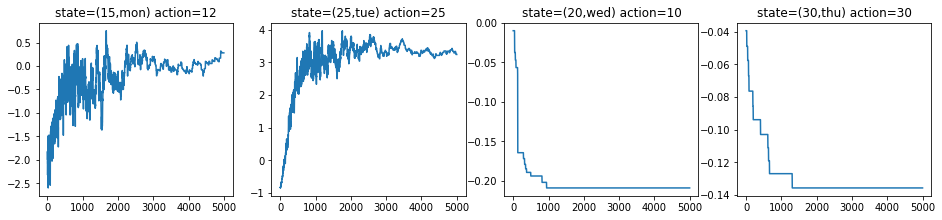

In [38]:
xaxis = np.asarray(range(0, len(States_track[('x-x-x-x-x-x-x-x-x')][(5,7)])))

plt.figure(0, figsize=(16,7))
plt.subplot(241)
plt.title('state=(15,mon) action=12')
plt.plot(xaxis,np.asarray(States_track[('x-x-x-x-x-x-x-x-x')][(5,7)]))
plt.subplot(242)
plt.title('state=(25,tue) action=25')
plt.plot(xaxis,np.asarray(States_track[('x-x-x-x-x-x-x-x-x')][(7,3)]))
plt.subplot(243)
plt.title('state=(20,wed) action=10')
plt.plot(xaxis,np.asarray(States_track[('x-3-x-4-x-x-x-x-x')][(2,7)]))
plt.subplot(244)
plt.title('state=(30,thu) action=30')
plt.plot(xaxis,np.asarray(States_track[('x-x-x-x-x-8-5-x-x')][(3,9)]))
# plt.subplot(245)
# plt.title('state=(10,sat) action=18')
# plt.plot(xaxis,np.asarray(States_track[('8-4-x-x-9-x-1-x-x')][(2,5)]))
# plt.subplot(247)
# plt.title('state=(50,sun) action=10')
# plt.plot(xaxis,np.asarray(States_track[('x-x-9-4-x-x-x-x-x')][(8,1)]))

# xaxis = np.asarray(range(0, len(States_track[('4-8-x-x-3-x-x-1-x')][(2,7)])))
# plt.title('state=(35,fri) action=15')
# plt.plot(xaxis,np.asarray(States_track[('4-8-x-x-3-x-x-1-x')][(2,7)]))
# plt.subplot(246)
plt.show()

### Epsilon - decay check

In [39]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

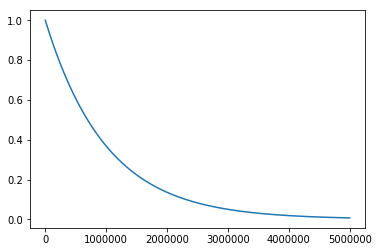

In [40]:
plt.plot(time, epsilon)
plt.show()